## Import and process data

Let's import all the necessary libraries.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
import seaborn as sns

Let's load the data and transform it into a DataFrame, by giving each column the appropriate name.

In [197]:
data = pd.read_csv('wdbc.data')
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [198]:
column_names = ['ID', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data = pd.read_csv('wdbc.data', names=column_names, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,25,26,27,28,29,30,31], delimiter=",")
data


,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Data preprocessing
Now that we have the DataFrame, we can start preprocessing the data to improve its quality.

In [199]:
data.shape

(569, 32)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset contains only one categorical feature, that is, diagnosis, which we'll have to process, and all the other features are of type float64.
We're going to drop the ID column as we're not going to use it in our analysis.

In [201]:
data.drop(['ID'], axis=1, inplace=True)

Let's encode the values for diagnosis: we'll map 'M', malignant, to 1, and 'B', benign, to 0.

In [202]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [203]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [204]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The data has no null values, so we won't have to fill any missing data or drop any columns. 

## Exploratory Data Analysis

### Descriptive statistics
We're going to observe a summary statistic that describes quantitatively the features of our dataset by using common metrics such as the mean and the standard deviation.

In [205]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


The following are the mean values for the diagnosis class, the class that we are going to be focused on. 

In [206]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [207]:
data['diagnosis'].unique(), data['diagnosis'].value_counts()

(array([1, 0]),
 diagnosis
 0    357
 1    212
 Name: count, dtype: int64)

<Axes: xlabel='diagnosis', ylabel='count'>

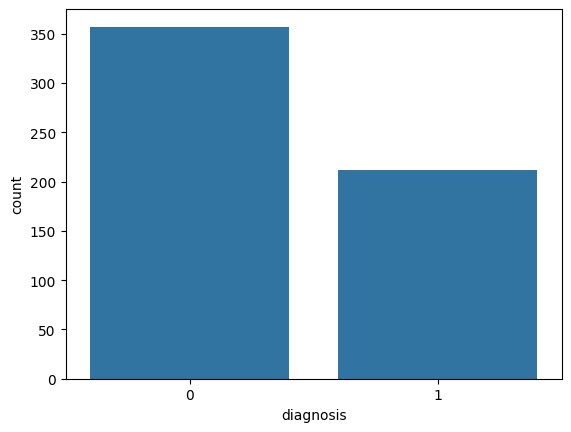

In [208]:
sns.countplot(x=data['diagnosis'])

We can clearly see that there are more benign (0) instances of cancer in the dataset.

### Pair Plots
Pair plots allow us to see the distribution of single variables and the relationships between pairs of variables.
We won't consider all of the features, just their mean values.

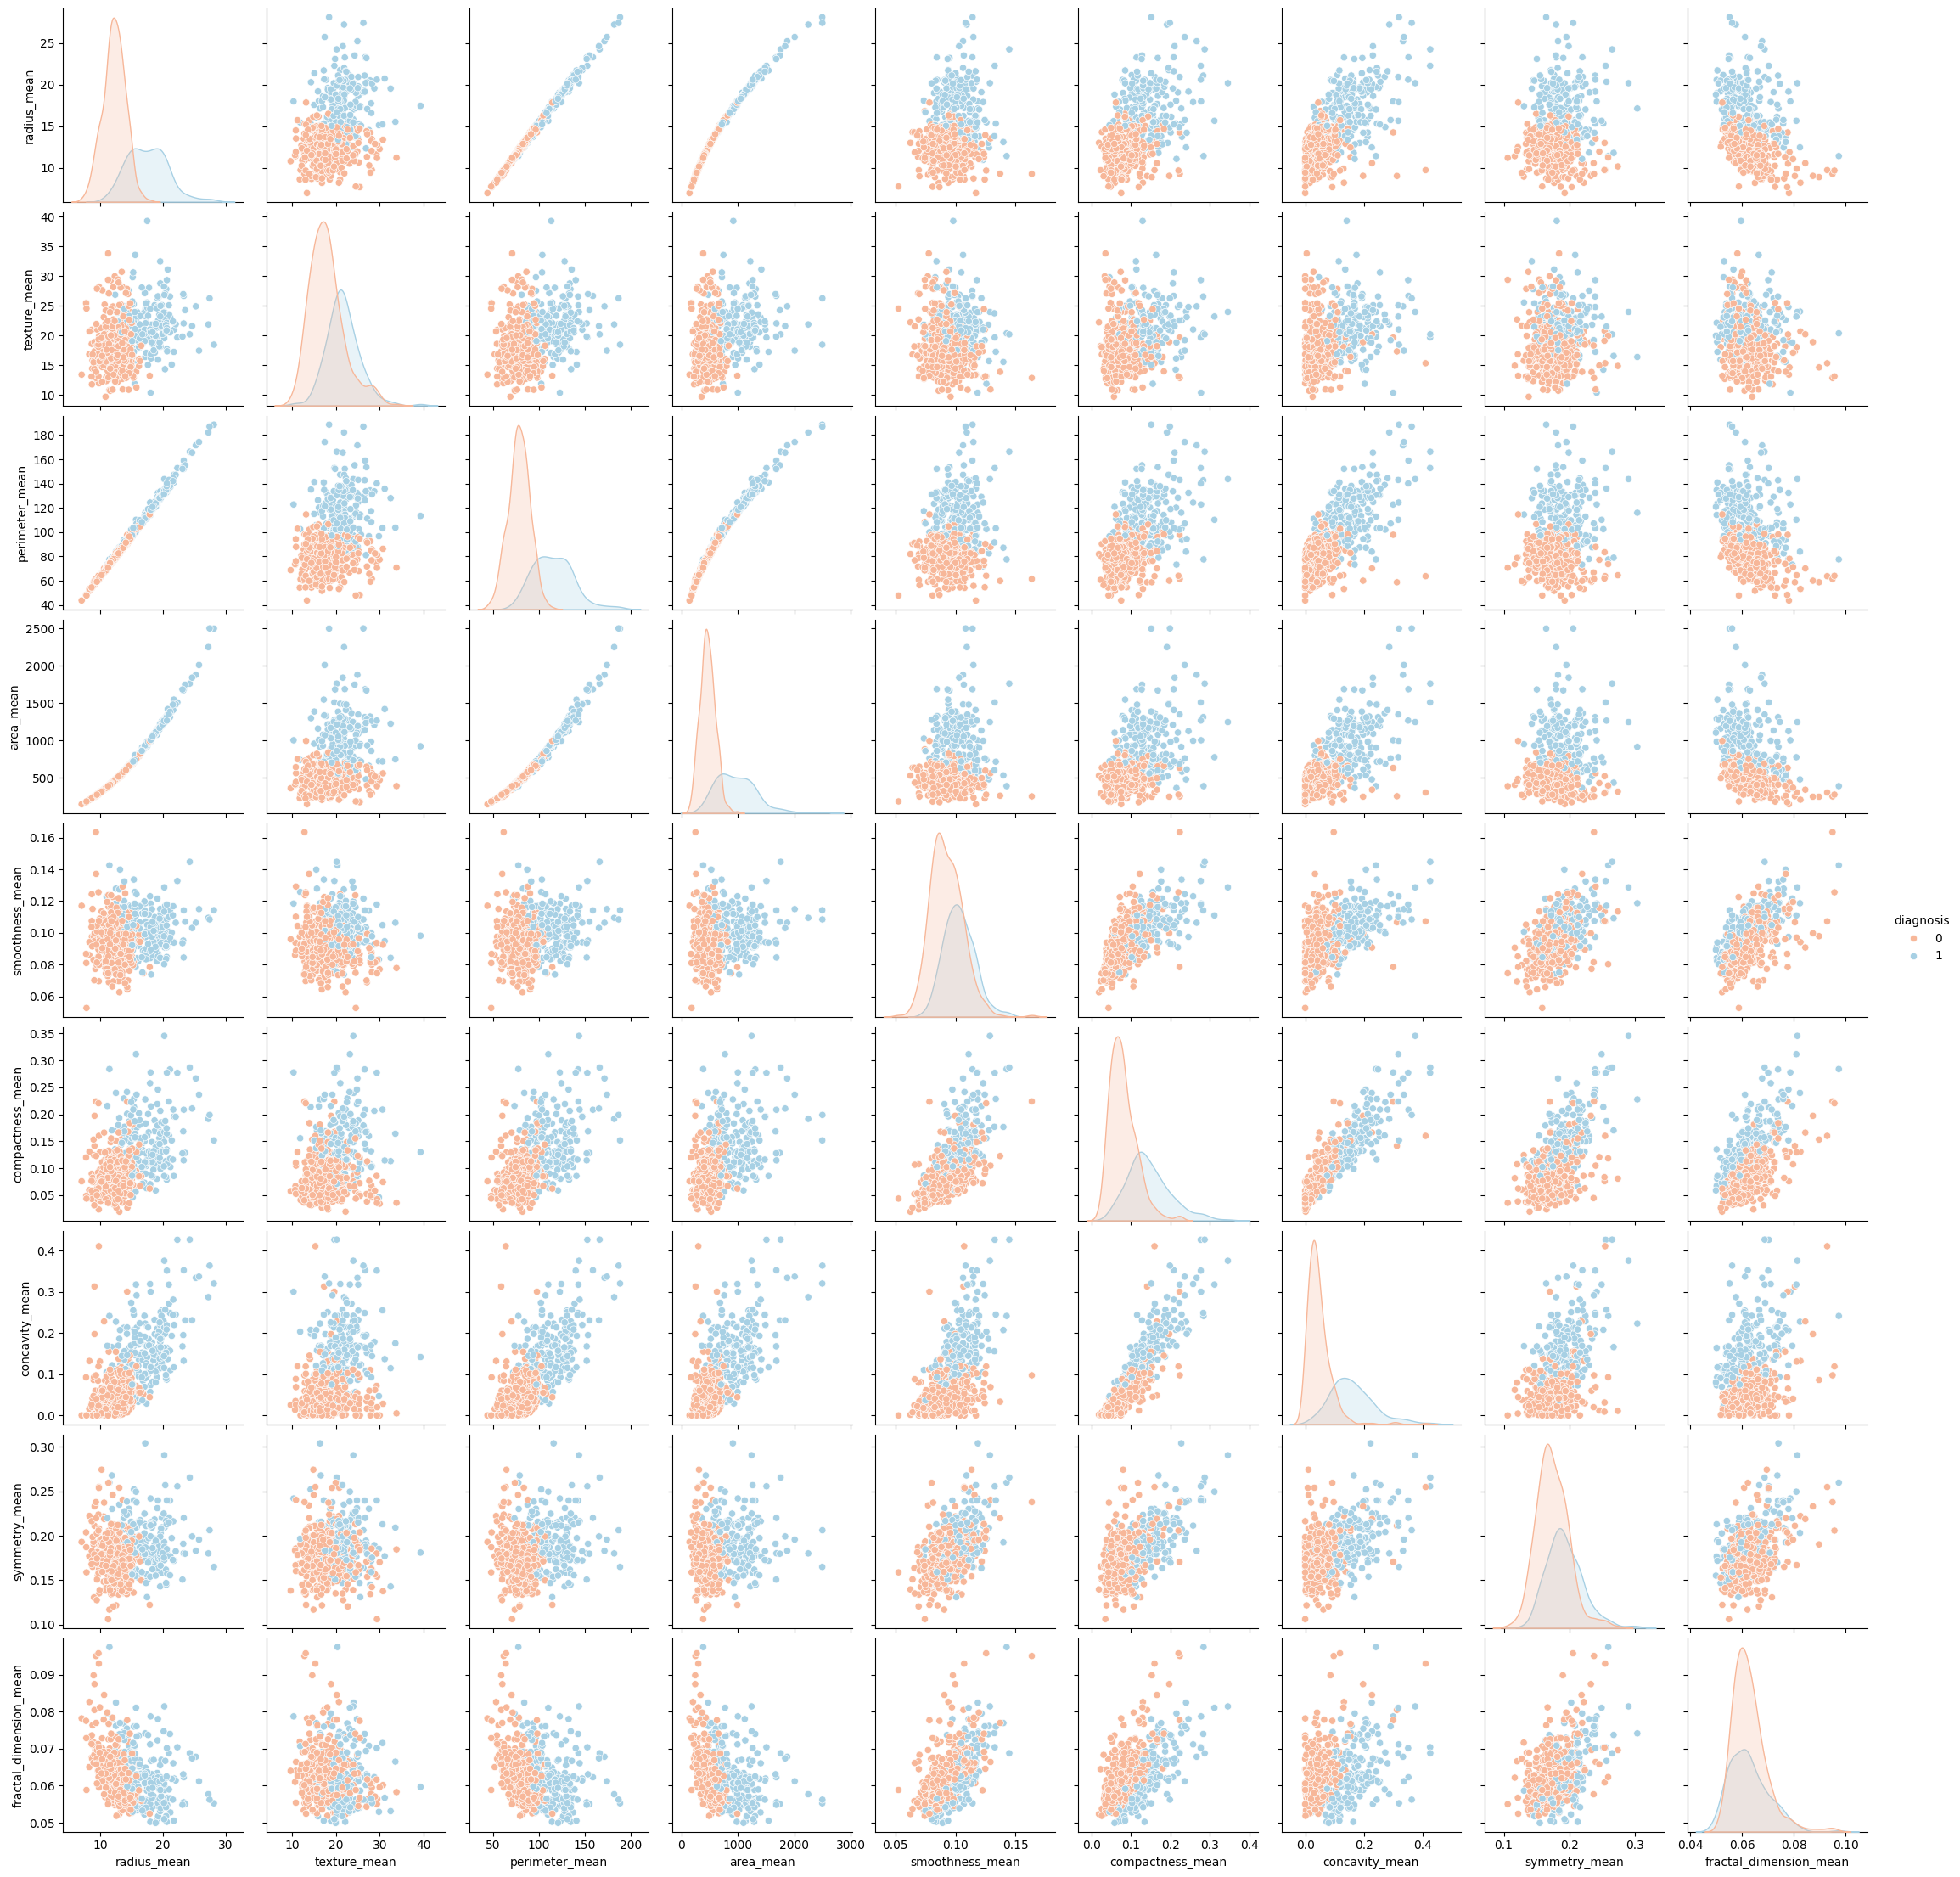

In [209]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(data = data[cols], hue='diagnosis', palette='RdBu')

From observing the pairplot above we can deduce that features such as the radius, compactness, concavity and concave points could be strong predictors for malignant cases, as there's separation between the classes. 

Features such as smoothness, texture and symmetry show more overlap between the two classes, meaning they might be less effective in detecting cancer.

The pairplot hints at the presence of multicollinearity between the radius, perimeter and area attributes, given that they're highly linearly related. Multicollinearity may also be implied by concavity, concave_points and compactness.

Given that in this project we're using kNN for classification, multicollinearity is less of a concern compared to linear models, as it's a distance-based algorithm and it doesn't rely on the coefficients of a linear equation. If we wanted to deal with this issue, we could've, for example, applied Principal Component Analysis (PCA).

### Correlation Matrix
We're now going to observe the correlation between the set's features.

<Axes: >

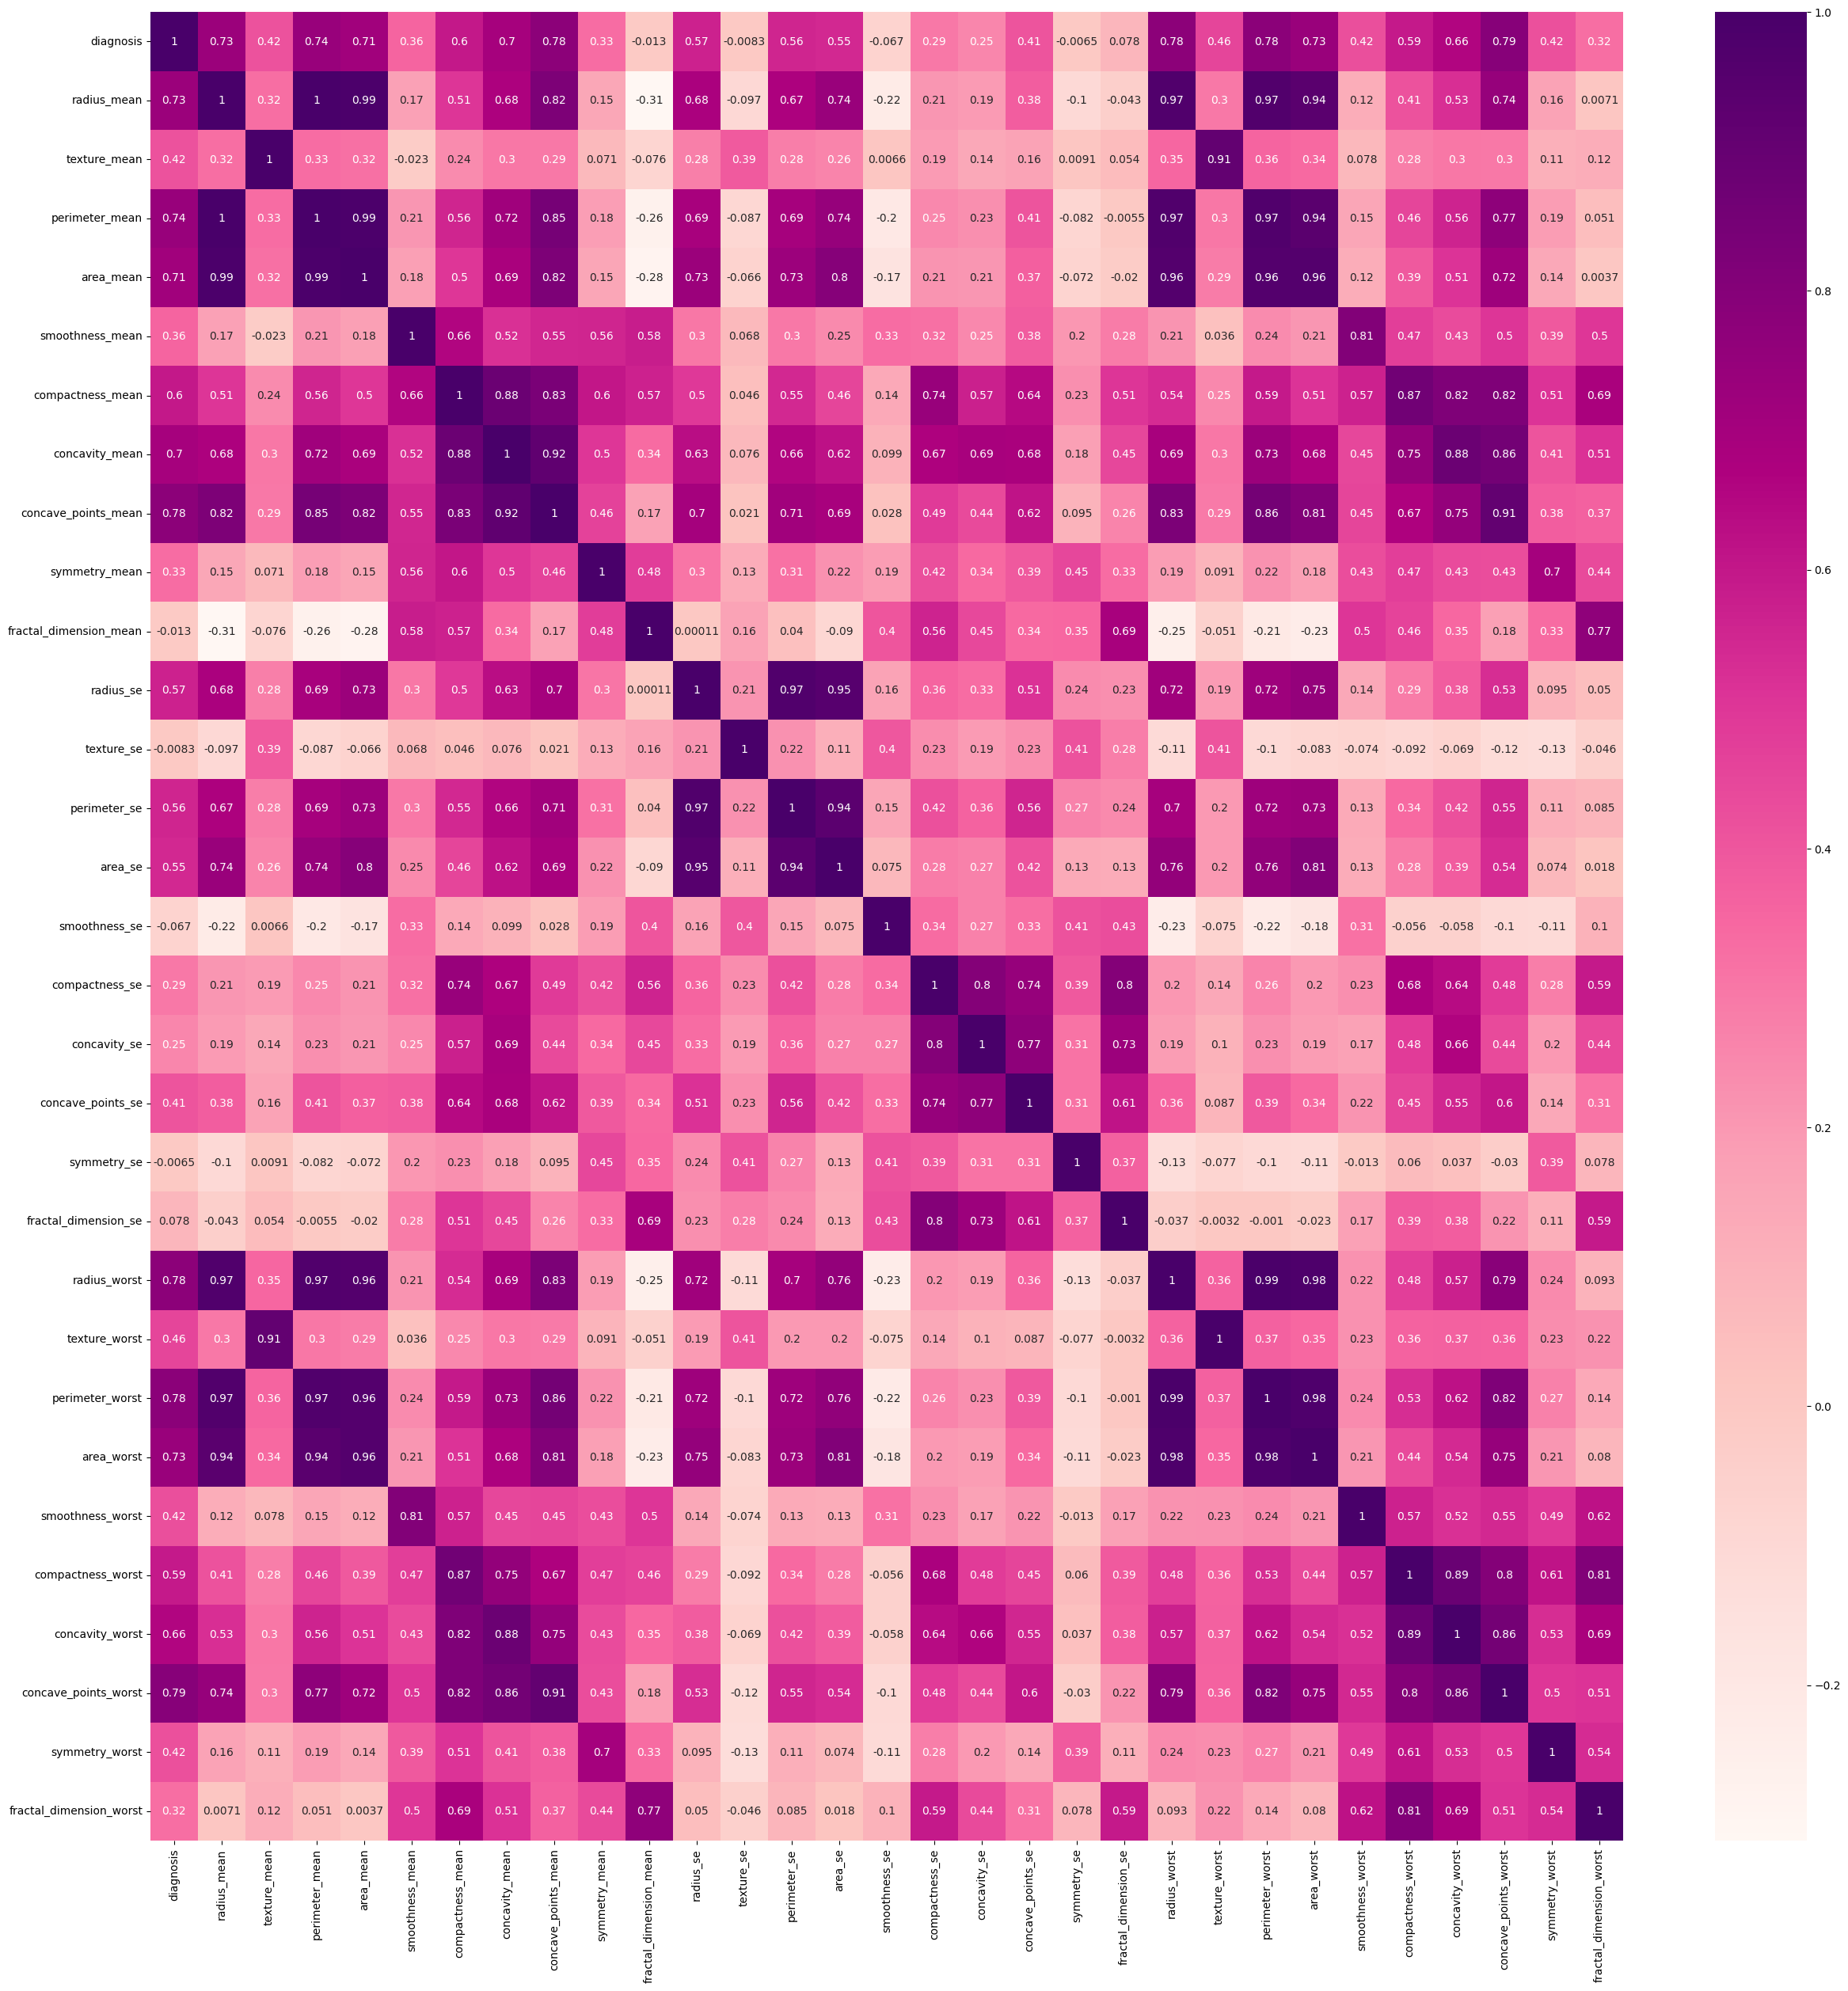

In [210]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, cmap='RdPu')

Interpreting a heatmap presenting this many values is tedious - let's simplify it by plotting a diagonal correlation matrix.

<Axes: >

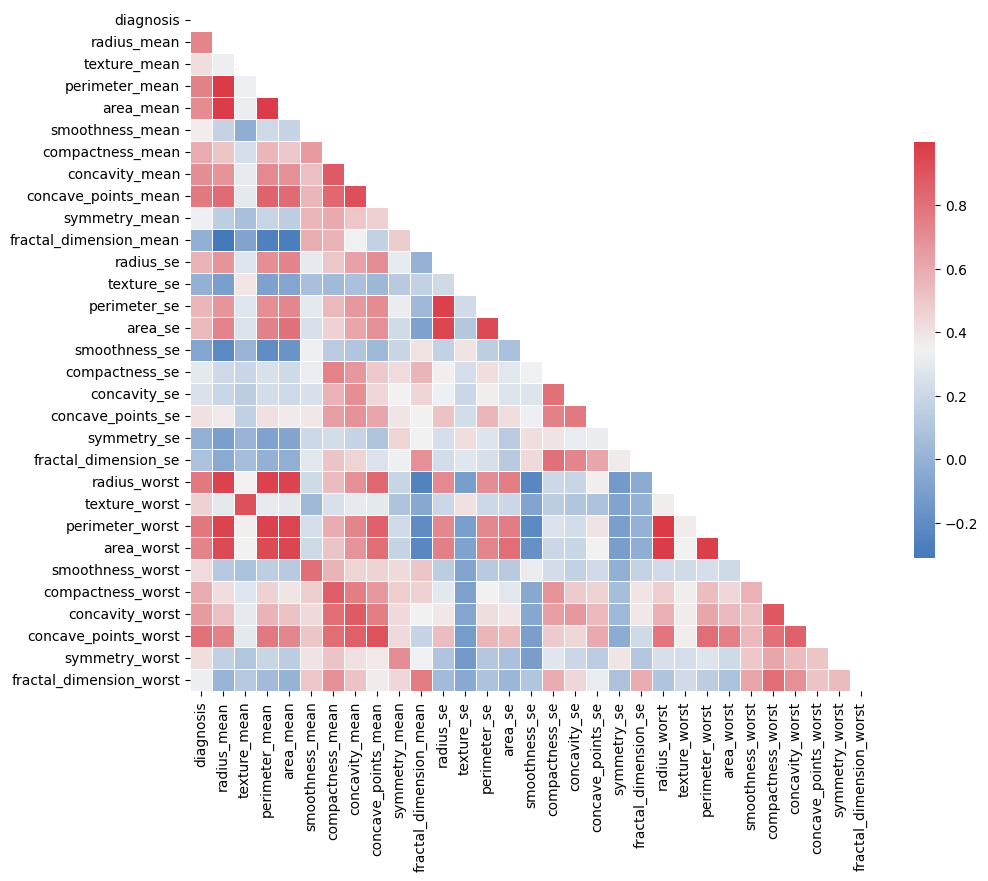

In [211]:
corr = data.corr()
#mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .6})

The heatmap and correlation diagram confirm our findings: radius, area and perimeter are very strongly correlated, with a correlation value over 0.9, and so are concave points, concavity and compactness; these are the features that show multicollinearity. 
These are also the features with the highest correlation to diagnosis.

## K-Nearest Neighbors Algorithm
We're going to use the kNN algorithm. It's a supervised machine learning algorithm which uses a labeled dataset to predict the class of the new instances.

### Splitting the dataset into Features and Labels
The labels is what we're trying to predict, in this case, the diagnosis, which we'll store in y. The features, which we'll store in X, are the attributes used to predict the labels.

In [212]:
X = data.drop('diagnosis', axis=1, inplace=False)
y = data['diagnosis']

Let's scale the numerical features, so that they all contribute equally to the distance calculations.

In [213]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now we're going to split the data into a training set and a testing set. The training data will create the kNN model, which we'll then test with the testing data, to evaluate its accuracy.

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [215]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

### Build the model
We're going to start with an arbitrary value of k, in this case 5. We'll find the ideal value later.

In [216]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

Let's make a prediction and then check the mean accuracy on the given test data and labels.

In [217]:
y_pred = knn.predict(X_test)

In [218]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9773869346733668
0.9590643274853801


These are pretty good scores! Let's perform cross validation to tune the hyperparameter k.

### Performing Cross Validation
Now to select the best k value, the hyperparameter, we'll perform 10 fold cross validation.

In [219]:
#List to store the neighbours
neighbours = []
#List to store the cross validation scores.
cv_scores=[]

for i in range(1,40):
    neighbours.append(i)
    knn= KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(knn,X_train,y_train, cv = 10, scoring='accuracy')
    cv_scores.append(score.mean())

### Finding the optimal number of k
We'll find the optimal k value, the one that provides the highest accuracy score, by plotting the misclassification error over the number of K neighbours.

In [220]:
#Misclassificaton error versus k
error = [1-x for x in cv_scores]

#Determining the best k value
optimal_k = neighbours[error.index(min(error))]

print('The optimal value of K (neighbors) is %d ' %optimal_k)        


The optimal value of K (neighbors) is 7 


Let's plot the misclassification error versus k.

Text(0, 0.5, 'Mean Error')

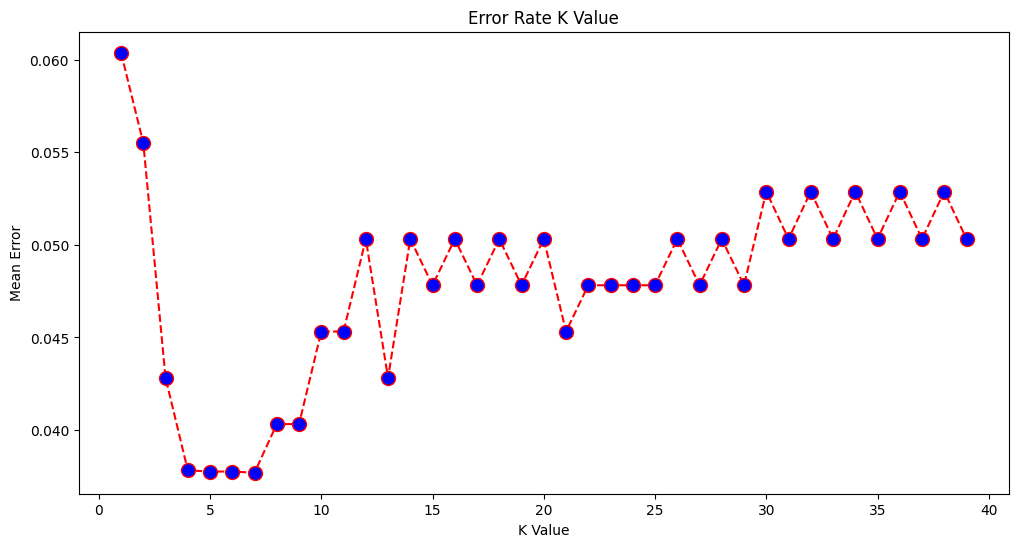

In [221]:
plt.figure(figsize=(12, 6))
plt.plot(neighbours, error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error') 

### Using the best k value on the model

In [222]:
#Retraining the KNN model using the best k value
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Let's predict with the model!

In [223]:
#Predicting with the tuned model
y_pred = model.predict(X_test)

## Results evaluation

### Accuracy, Precision and Recall

In [224]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9590643274853801
Precision: 0.9590643274853801
Recall: 0.9590643274853801


The model performs well in this scenario!

### Classification report
The classification report shows the main evaluation metrics for each class.

In [225]:
from sklearn.metrics import classification_report
print("Classification Report: \n\n")
print(classification_report(y_test, y_pred))

Classification Report: 


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



The model performs well, and both classes have high precision, recall, and f1-scores, but the model is slightly better at identifying class '0' as opposed to class '1'.

### Confusion matrix
The confusion matrix represents the accuracy visualisation of the model.

In [226]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[105,   3],
       [  4,  59]])

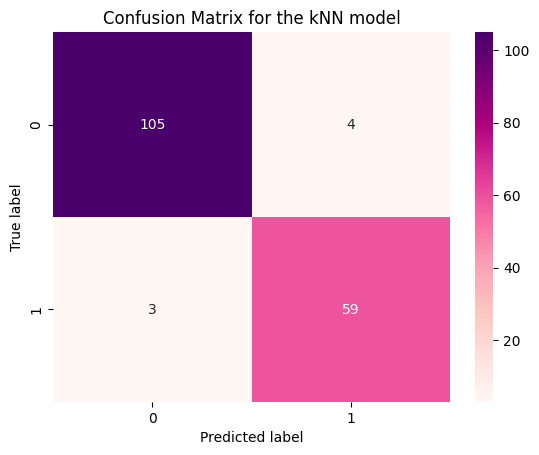

In [227]:
#Plotting the matrix
sns.heatmap(cm.T, annot=True, fmt='d', cmap='RdPu')
plt.title("Confusion Matrix for the kNN model")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

Overall, the kNN model does a good job at classification, with strong performance metrics, although there are a few cases where it misclassifies instances.


## Conclusion

After implementing and executing the model created using the k-Nearest Neighbor classifier algorithm, the model has an accuracy score of 95.9% for the 'Breast Cancer Wisconsin (Diagnostic) Data Set'.

This accuracy score can be considered a good one in classifying instances of the dataset.